In [21]:
import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, confusion_matrix,
                            classification_report, roc_auc_score,
                            RocCurveDisplay)
from sklearn.preprocessing import LabelEncoder

In [22]:
# =================================
# 1. Load and Explore the Iris Data
# =================================
iris = load_iris()
df = pd.DataFrame(data=np.c_[iris['data'], iris['target']],
                  columns=iris['feature_names'] + ['target'])
df['species'] = df['target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

print("First 5 rows:")
print(df.head())
print("\nDataset info:")
print(df.info())
print("\nClass distribution:")
print(df['species'].value_counts())

First 5 rows:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target species  
0     0.0  setosa  
1     0.0  setosa  
2     0.0  setosa  
3     0.0  setosa  
4     0.0  setosa  

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-

In [23]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0.0,setosa
1,4.9,3.0,1.4,0.2,0.0,setosa
2,4.7,3.2,1.3,0.2,0.0,setosa
3,4.6,3.1,1.5,0.2,0.0,setosa
4,5.0,3.6,1.4,0.2,0.0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0,virginica
146,6.3,2.5,5.0,1.9,2.0,virginica
147,6.5,3.0,5.2,2.0,2.0,virginica
148,6.2,3.4,5.4,2.3,2.0,virginica


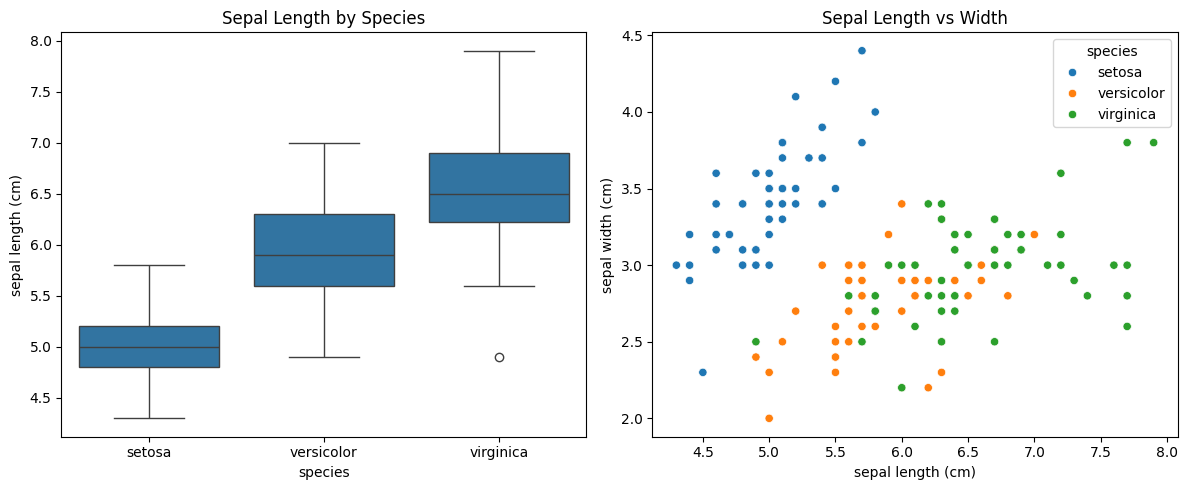

In [24]:
# =================================
# 2. Data Visualization
# =================================
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='species', y='sepal length (cm)')
plt.title('Sepal Length by Species')

plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x='sepal length (cm)', y='sepal width (cm)', hue='species')
plt.title('Sepal Length vs Width')
plt.tight_layout()
plt.show()


In [25]:
# =================================
# 3. Preprocessing
# =================================
X = df[iris['feature_names']]
y = df['target']

# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
# =================================
# 4. Train Decision Tree Model
# =================================
model = DecisionTreeClassifier(max_depth=3, random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

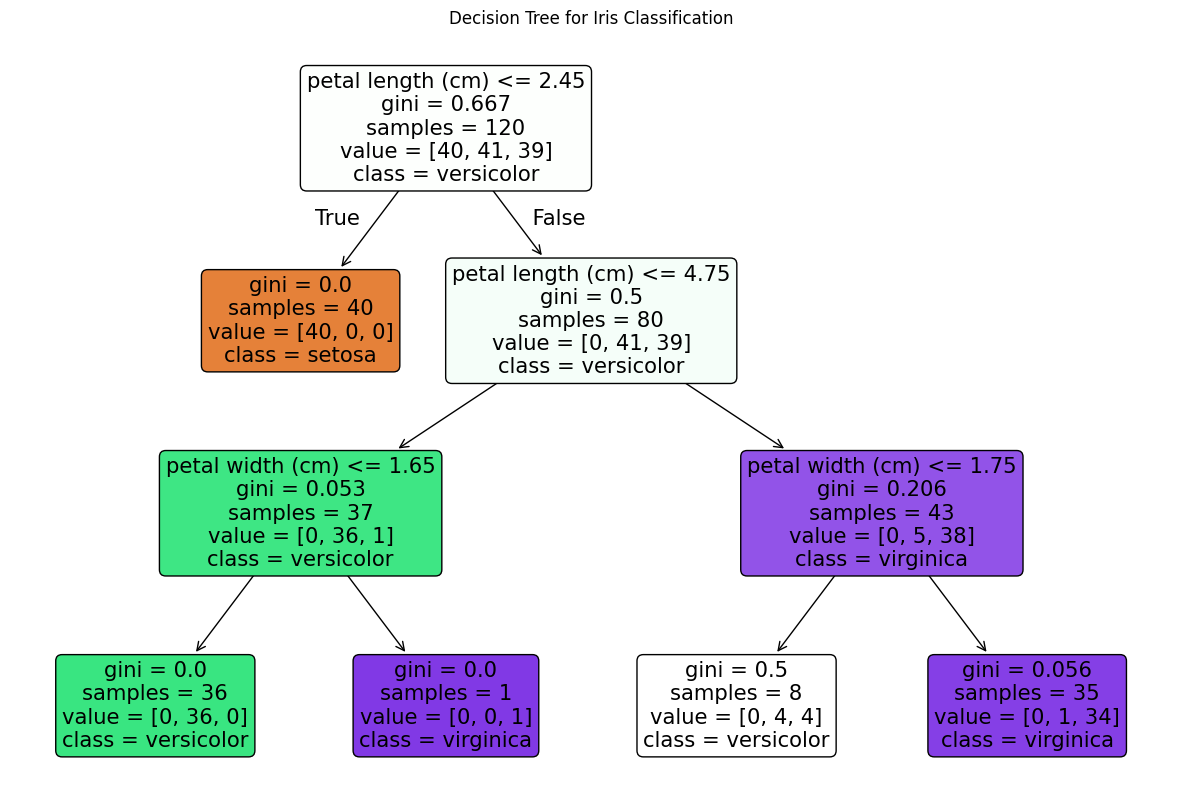

In [27]:
# =================================
# 5. Visualize the Decision Tree
# =================================
plt.figure(figsize=(15, 10))
plot_tree(model,
          feature_names=iris.feature_names,
          class_names=iris.target_names,
          filled=True,
          rounded=True)
plt.title("Decision Tree for Iris Classification")
plt.show()



Accuracy: 1.00


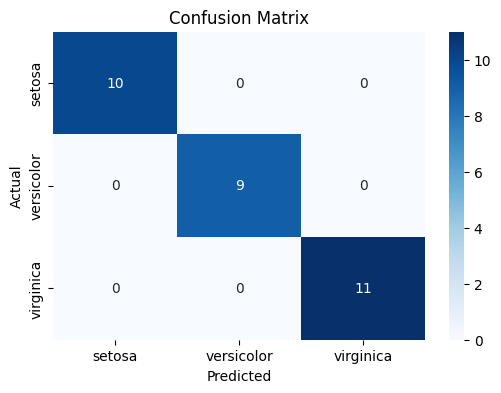


Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

ROC AUC Score: 1.000


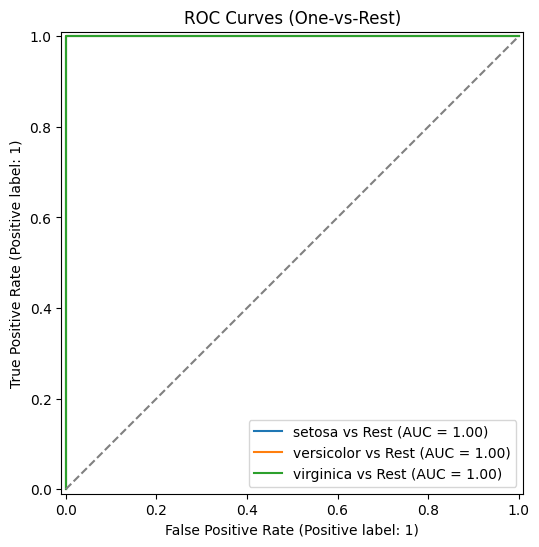

In [28]:
# =================================
# 6. Model Evaluation
# =================================
# Predictions
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.2f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=iris.target_names,
            yticklabels=iris.target_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

# ROC AUC (One-vs-Rest for multiclass)
roc_auc = roc_auc_score(y_test, y_proba, multi_class='ovr')
print(f"ROC AUC Score: {roc_auc:.3f}")

# ROC Curves
fig, ax = plt.subplots(figsize=(8, 6))
for i in range(3):
    RocCurveDisplay.from_predictions(
        y_test == i,
        y_proba[:, i],
        name=f"{iris.target_names[i]} vs Rest",
        ax=ax
    )
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('ROC Curves (One-vs-Rest)')
plt.show()

/tmp/ipython-input-29-890954443.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance, x='Importance', y='Feature', palette='viridis')


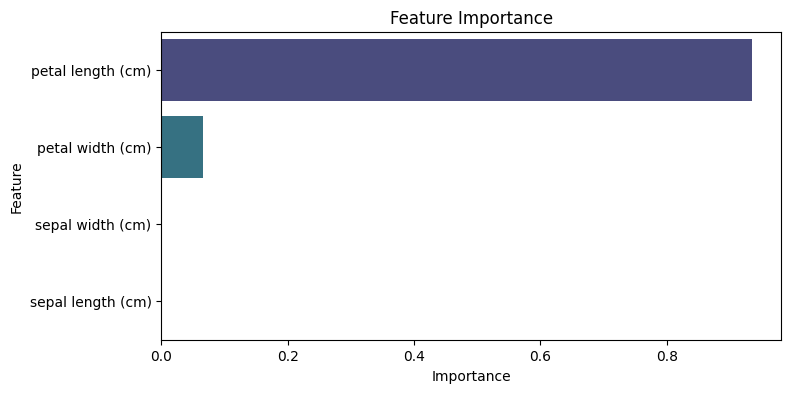

In [29]:
# =================================
# 7. Feature Importance
# =================================
importance = pd.DataFrame({
    'Feature': iris.feature_names,
    'Importance': model.feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(8, 4))
sns.barplot(data=importance, x='Importance', y='Feature', palette='viridis')
plt.title('Feature Importance')
plt.show()

In [30]:
with open('DT_model.pkl', 'wb') as f:
    pickle.dump(model, f)

print("Model saved as 'DT_model.pkl'")

Model saved as 'DT_model.pkl'
